In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def in_func(x):
    if (0.4 <= x and x <= 0.5):
        return 10 * x - 4
    elif (0.5 <= x and x <= 0.6):
        return -10 * x + 6
    else:
        return 0
def init_(prev_, current_, h, tau, number_of_x_steps):
    for i in range(0, number_of_x_steps):
        prev_[i] = in_func(i * h)
        current_[i] = in_func(i * h - tau)
def real_solution(h, tau, number_of_time_steps, number_of_x_steps):
    real_sol = np.zeros(number_of_x_steps)
    for i in range(0, number_of_x_steps):
        real_sol[i] = in_func(i * h - tau * number_of_time_steps)
    return real_sol
def get_alphas(CFL, alpha00, alpha0_1):
    alpha_10 = (2 - CFL - 2 * alpha00 - alpha0_1) / (2 + CFL)
    alpha0_2 = (2 * CFL - CFL * alpha00 - (CFL + 1) * alpha0_1) / (2 + CFL)
    return np.array([alpha00, alpha0_1, alpha0_2, alpha_10])
def solve(order, CFL, alpha00, alpha0_1, number_of_time_steps, number_of_x_steps):
    a = get_alphas(CFL, alpha00, alpha0_1)
    next_ = np.zeros(number_of_x_steps)
    current_ = np.zeros(number_of_x_steps)
    prev_ = np.zeros(number_of_x_steps)
    init_(prev_, current_, h, tau, number_of_x_steps)
    for i in range(0, number_of_time_steps):
        next_[0] = 0
        if (order == 1):
            next_[1] = 0
        elif (order == 2):
            next_[1] = current_[1] * (1 - tau / h)
        elif (order == 3):
            next_[1] = current_[1] * (1 - tau**2 / h**2) + current_[2] * (tau**2 /(2 * h**2) - tau / (2 * h))
        for j in range(2, number_of_x_steps):
            next_[j] = a[2] * current_[j - 2] + a[1] * current_[j - 1] + a[0] * current_[j] + a[3] * prev_[j]
        prev_ = current_.copy()
        current_ = next_.copy()
    return next_

In [21]:
h = 1.0 / 100
CFL = 0.5
tau = h * CFL
number_of_time_steps = 100
number_of_x_steps = 201
real_sol = real_solution(h, tau, number_of_time_steps, number_of_x_steps)
grid = np.linspace(0, 2, number_of_x_steps)

In [22]:
def show_sol(al00, al_10, num, order, CFL):
    num_sol_1 = solve(order, CFL, al00, al_10, number_of_time_steps, number_of_x_steps)
    plt.plot(grid, num_sol_1, label=r"$\alpha^{0}_{0} =$" + str(round(al00, 3)) + r"$, \alpha^{0}_{-1} = $" + str(round(al_10, 3)))
    plt.plot(grid, real_sol, label="exact solution")
    plt.legend(loc='upper left')
    # plt.savefig("sol_{}.png".format(num), bbox_inches="tight", dpi=300)

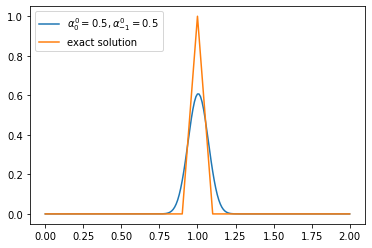

In [23]:
show_sol(0.5, 0.5, 1, 1, CFL)

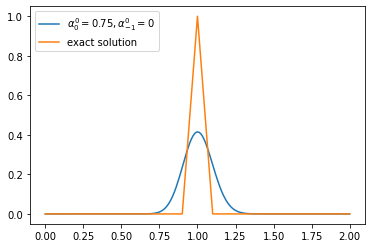

In [24]:
show_sol(0.75, 0, 2, 1, CFL)

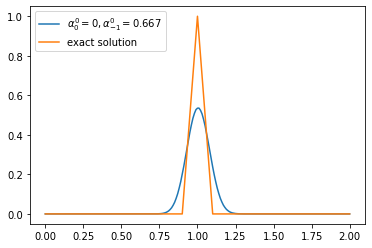

In [25]:
show_sol(0, 2.0 / 3, 3, 1, CFL)

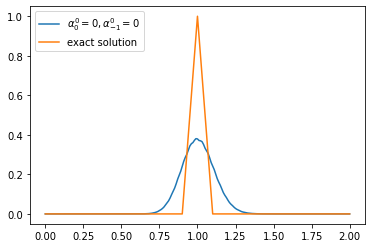

In [26]:
show_sol(0, 0, 4, 1, CFL)

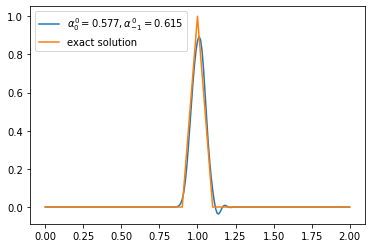

In [27]:
show_sol(15.0 / 26, 8.0 / 13 , 5, 2, CFL)

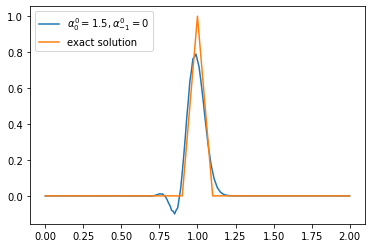

In [28]:
show_sol(1.5 , 0 , 6, 2, CFL)

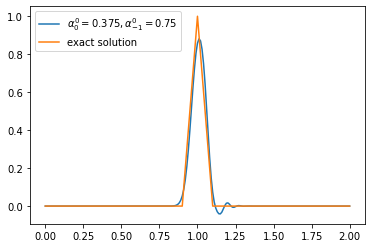

In [29]:
show_sol(3.0 / 8 , 3.0 / 4 , 7, 2, CFL)

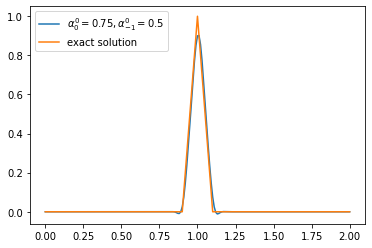

In [30]:
show_sol(3.0 / 4 , 1.0 / 2 , 8, 3, CFL)

In [31]:
def check_condition(tmp, a, b):
    if(a <= b):
        if(a <= tmp and tmp <= b):
            return 1
    else:
        if(b <= tmp and tmp <= a):
            return 1   
    return 0 

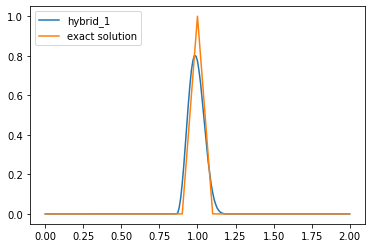

In [32]:
def solve_hybrid_1(CFL, number_of_time_steps, number_of_x_steps):
    a = get_alphas(CFL, alpha00=1.5, alpha0_1=0)
    b = get_alphas(CFL, alpha00=3.0 / 8, alpha0_1=3.0 / 4)
    next_ = np.zeros(number_of_x_steps)
    current_ = np.zeros(number_of_x_steps)
    prev_ = np.zeros(number_of_x_steps)
    init_(prev_, current_, h, tau, number_of_x_steps)
    for i in range(0, number_of_time_steps):
        next_[0] = 0
        next_[1] = current_[1] * (1 - tau / h) #order always = 2
        for j in range(2, number_of_x_steps):
            tmp = a[2] * current_[j - 2] + a[1] * current_[j - 1] + a[0] * current_[j] + a[3] * prev_[j]
            if(check_condition(tmp, current_[j], current_[j - 1])):
                next_[j] = tmp
            else:
                next_[j] = b[2] * current_[j - 2] + b[1] * current_[j - 1] + b[0] * current_[j] + b[3] * prev_[j]
        prev_ = current_.copy()
        current_ = next_.copy()
    return next_
def show_sol_hybrid_1(num):
    num_sol_1 = solve_hybrid_1(CFL, number_of_time_steps, number_of_x_steps)
    plt.plot(grid, num_sol_1, label="hybrid_1")
    plt.plot(grid, real_sol, label="exact solution")
    plt.legend(loc='upper left')
    # plt.savefig("sol_{}.png".format(num), bbox_inches="tight", dpi=300)
show_sol_hybrid_1(9)

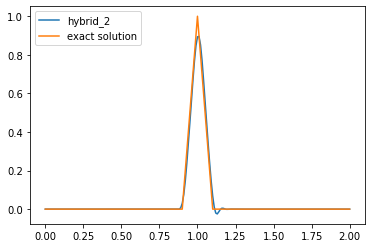

In [33]:
def solve_hybrid_2(CFL, number_of_time_steps, number_of_x_steps):
    a = get_alphas(CFL, alpha00=3.0 / 4, alpha0_1=1.0 / 2)
    b = get_alphas(CFL, alpha00=3.0 / 8, alpha0_1=3.0 / 4)
    next_ = np.zeros(number_of_x_steps)
    current_ = np.zeros(number_of_x_steps)
    prev_ = np.zeros(number_of_x_steps)
    init_(prev_, current_, h, tau, number_of_x_steps)
    for i in range(0, number_of_time_steps):
        next_[0] = 0
        next_[1] = current_[1] * (1 - tau**2 / h**2) + current_[2] * (tau**2 /(2 * h**2) - tau / (2 * h)) #order always = 3
        for j in range(2, number_of_x_steps):
            tmp = a[2] * current_[j - 2] + a[1] * current_[j - 1] + a[0] * current_[j] + a[3] * prev_[j]
            if(check_condition(tmp, current_[j], current_[j - 1])):
                next_[j] = tmp
            else:
                next_[j] = b[2] * current_[j - 2] + b[1] * current_[j - 1] + b[0] * current_[j] + b[3] * prev_[j]
        prev_ = current_.copy()
        current_ = next_.copy()
    return next_
def show_sol_hybrid_2(num):
    num_sol_1 = solve_hybrid_2(CFL, number_of_time_steps, number_of_x_steps)
    plt.plot(grid, num_sol_1, label="hybrid_2")
    plt.plot(grid, real_sol, label="exact solution")
    plt.legend(loc='upper left')
    # plt.savefig("sol_{}.png".format(num), bbox_inches="tight", dpi=300)
show_sol_hybrid_2(10)

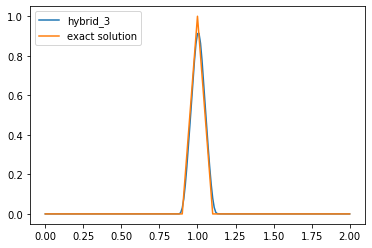

In [34]:
def solve_hybrid_3(CFL, number_of_time_steps, number_of_x_steps):
    a = get_alphas(CFL, alpha00=3.0 / 4, alpha0_1=1.0 / 2)
    b = get_alphas(CFL, alpha00=3.0 / 8, alpha0_1=3.0 / 4)
    c = get_alphas(CFL, alpha00=1.5, alpha0_1=0)
    next_ = np.zeros(number_of_x_steps)
    current_ = np.zeros(number_of_x_steps)
    prev_ = np.zeros(number_of_x_steps)
    init_(prev_, current_, h, tau, number_of_x_steps)
    for i in range(0, number_of_time_steps):
        next_[0] = 0
        next_[1] = current_[1] * (1 - tau**2 / h**2) + current_[2] * (tau**2 /(2 * h**2) - tau / (2 * h)) #order always = 3
        for j in range(2, number_of_x_steps):
            tmp = a[2] * current_[j - 2] + a[1] * current_[j - 1] + a[0] * current_[j] + a[3] * prev_[j]
            if (check_condition(tmp, current_[j], current_[j - 1])):
                next_[j] = tmp
            else:
                tmp = b[2] * current_[j - 2] + b[1] * current_[j - 1] + b[0] * current_[j] + b[3] * prev_[j]
                if (check_condition(tmp, current_[j], current_[j - 1])):
                    next_[j] = tmp
                else:
                    next_[j] = c[2] * current_[j - 2] + c[1] * current_[j - 1] + c[0] * current_[j] + c[3] * prev_[j]
        prev_ = current_.copy()
        current_ = next_.copy()
    return next_
def show_sol_hybrid_3(num):
    num_sol_1 = solve_hybrid_3(CFL, number_of_time_steps, number_of_x_steps)
    plt.plot(grid, num_sol_1, label="hybrid_3")
    plt.plot(grid, real_sol, label="exact solution")
    plt.legend(loc='upper left')
    # plt.savefig("sol_{}.png".format(num), bbox_inches="tight", dpi=300)
show_sol_hybrid_3(11)